In [37]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# Load preprocessed data
data = pd.read_csv('merged_data.csv')
data = data.drop(index=0)

X = data.drop(columns=['DATE']).values  # Adjust if the date column has a different name

# Train the HMM
n_states = 5 # Number of regimes
hmm_model = GaussianHMM(n_components=n_states, covariance_type="spherical", random_state=42)
hmm_model.fit(X)

# Predict the hidden states (regimes)
hidden_states = hmm_model.predict(X)

# Add predicted regimes to the dataset
data['Regime'] = hidden_states

# Save the results
data.to_csv("hmm_regimes.csv", index=False)

# Output the first few rows with the regimes
print("The processed dataset with HMM regimes has been saved as 'processed_data_with_hmm_regimes.csv'.")
print(data.head())


The processed dataset with HMM regimes has been saved as 'processed_data_with_hmm_regimes.csv'.
         DATE  gdp_percent_change  inflation_percent_change  \
1  1961-07-31            0.632030                  0.268097   
2  1961-08-31            0.653890                  0.066845   
3  1961-09-30            0.649642                  0.133601   
4  1961-10-31            0.645449                  0.000000   
5  1961-11-30            0.594554                  0.000000   

   unemployment_percent_change     Slope  LongTermRate  ZeroCouponYield1Y  \
1                     1.449275 -1.967420      4.100839          -0.044620   
2                    -5.714286 -1.712356      4.248369           0.056193   
3                     1.515152 -1.691689      4.130283           0.013840   
4                    -2.985075 -1.607382      3.815504          -0.026376   
5                    -6.153846  0.181058      2.281570           0.007552   

   ZeroCouponYield2Y  ZeroCouponYield3Y  ZeroCouponYield4Y  ..

c:\Users\devpa\anaconda3\envs\xgboost-env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
data

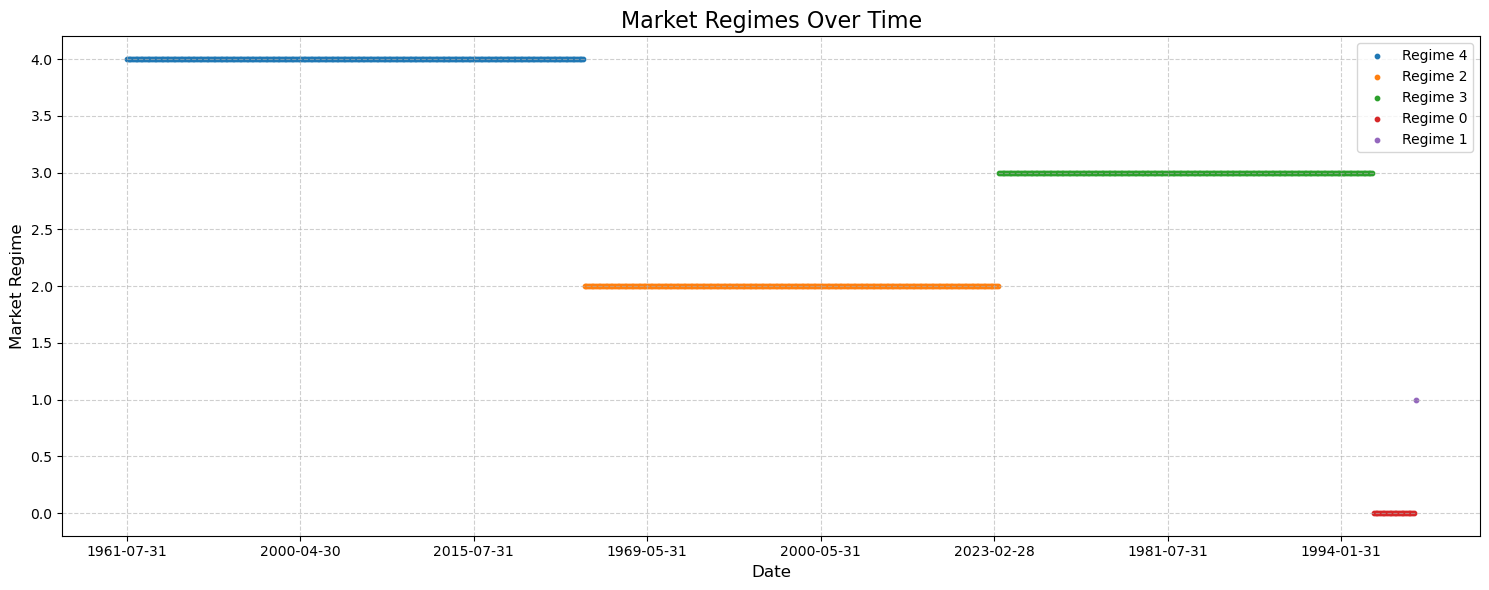

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the newly uploaded file with predicted regimes
regime_file_path = 'hmm_regimes.csv'
regime_data = pd.read_csv(regime_file_path)

# Plot the market regimes with improved formatting
plt.figure(figsize=(15, 6))
for regime in regime_data['Regime'].unique():
    regime_subset = regime_data[regime_data['Regime'] == regime]
    plt.scatter(regime_subset['DATE'], regime_subset['Regime'], label=f'Regime {regime}', s=10)

# Adjust x-axis ticks for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show fewer ticks on x-axis

# Add titles and labels
plt.title('Market Regimes Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Regime', fontsize=12)

# Add grid, legend, and adjust layout
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the improved plot
plt.show()


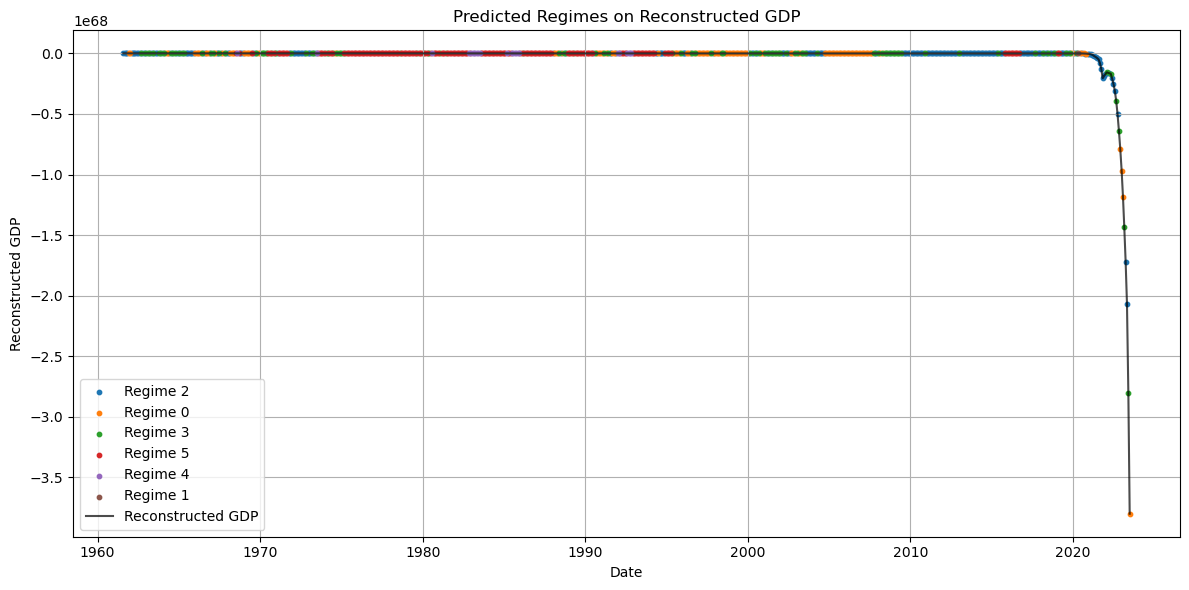

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with predicted regimes

data = pd.read_csv('hmm_regimes.csv')

# Ensure 'Date' is treated as a datetime object
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'])

# Reconstruct GDP values from percent change using 2000 as the starting value
initial_gdp = 2000
gdp_values = [initial_gdp]

# Iterate to reconstruct GDP from percent change
for pct_change in data['gdp_percent_change']:
    gdp_values.append(gdp_values[-1] * (1 + pct_change))

# Add reconstructed GDP to the dataset
data['Reconstructed_GDP'] = gdp_values[1:]  # Skip the initial value

# Plot reconstructed GDP with predicted states
plt.figure(figsize=(12, 6))
for regime in data['Regime'].unique():
    regime_data = data[data['Regime'] == regime]
    plt.scatter(regime_data['DATE'], regime_data['Reconstructed_GDP'], label=f'Regime {regime}', s=10)

plt.plot(data['DATE'], data['Reconstructed_GDP'], label="Reconstructed GDP", color="black", alpha=0.7)
plt.title('Predicted Regimes on Reconstructed GDP')
plt.xlabel('Date')
plt.ylabel('Reconstructed GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()